In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
plt.rcParams['font.size'] = 8
plt.rc('font', size=10) 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('../data/Mental Illness Survey 1.csv')
data.head(10)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Response,Response,Response,Open-Ended Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,6.630447e+09,168522804.0,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,NaN,NaN,NaN,NaN,06f645d7ea5af372d50a62bd17,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,168522804.0,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,NaN,NaN,NaN,NaN,abca2776418ff1fe24bb85e21f,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,168522804.0,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,NaN,NaN,NaN,NaN,3800088cf4e55278b38bbe67f3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,168522804.0,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,NaN,NaN,NaN,NaN,84585803a3cec189f89fe43d44,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,6.630290e+09,168522804.0,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,NaN,NaN,NaN,NaN,4b4faaaa7eaff01549233044bd,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
6,6.630246e+09,168522804.0,01/15/2018 12:40:03 AM,01/15/2018 12:42:26 AM,NaN,NaN,NaN,NaN,4cc5941a4f2572aa7c4a708008,No,High School or GED,Yes,No,0,Yes,No,Yes,Yes,No,0,0,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet
7,6.630236e+09,168522804.0,01/15/2018 12:30:16 AM,01/15/2018 12:31:51 AM,NaN,NaN,NaN,NaN,c06b5c9b4f73dccbdf2af2f67f,No,Some Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,1,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
8,6.630216e+09,168522804.0,01/15/2018 12:08:46 AM,01/15/2018 12:11:24 AM,NaN,NaN,NaN,NaN,40ca6ac2f0a327e96d797478a4,Yes,Some Undergraduate,Yes,No,0,Yes,No,Yes,Yes,No,0,11,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,Compulsive behavior,Tiredness,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
9,6.630198e+09,168522804.0,01/14/2018 11:50:35 PM,01/14/2018 11:52:27

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

In [5]:
data.describe()

,Respondent ID,Collector ID,IP Address,Email Address,First Name,Last Name
count,3.340000e+02,334.0,0.0,0.0,0.0,0.0
mean,6.629322e+09,168522804.0,NaN,NaN,NaN,NaN
std,3.043201e+05,0.0,NaN,NaN,NaN,NaN
min,6.629048e+09,168522804.0,NaN,NaN,NaN,NaN
25%,6.629154e+09,168522804.0,NaN,NaN,NaN,NaN
50%,6.629224e+09,168522804.0,NaN,NaN,NaN,NaN
75%,6.629310e+09,168522804.0,NaN,NaN,NaN,NaN
max,6.630447e+09,168522804.0,NaN,NaN,NaN,NaN


All data collection occurred over 2 days

In [6]:
pd.to_datetime(data['Start Date'].values).min()

Timestamp('2018-01-14 03:24:06')

In [7]:
pd.to_datetime(data['End Date'].values).max()

Timestamp('2018-01-15 03:48:24')

In [8]:
np.mean((pd.to_datetime(data['End Date']) - pd.to_datetime(data['Start Date'])))

Timedelta('0 days 00:02:31.889221556')

# Cleaning & Preprocessing
So we see that this data needs quite a bit of cleaning.
- deal with secondary header
- unnamed cols
- cols to drop
- Handle nulls
- convert cols to appropriate dtype
- a lot of categorical data
    - label encoding
    - one hot encoding

## Rename & Drop cols
- The collector id is the same for all records, so drop. 
- I don't need the respondent id since they are all unique and we can use index as the id
- IP Address, Email Address, First Name, and Last Name are all full of nulls
- I have no definition for 'Custom Data 1' and it is not apparent what it represents
- Some features seem to be asking very similar things and are likely colinear
    - 'I have been hospitalized before for my mental illness' and 'How many days were you hospitalized for your mental illness"
    - 'I have a gap in my resume' and 'Total length of any gaps in my resume in months.'
    - 'I am currently employed at least part-time' and 'I am unemployed'
- consider dropping 'Annual income (including any social welfare programs) in USD' and 'Annual income from social welfare programs' if target is about unemployment since these cols may lead to an overfit model
    


In [9]:
# Name Unnamed cols
data.rename(columns={'Unnamed: 28':'Anxiety',
                     'Unnamed: 29':'Depression',
                     'Unnamed: 30':'Obsessive_thinking',
                     'Unnamed: 31':'Mood_swings',
                     'Unnamed: 32':'Panic_attacks',
                     'Unnamed: 33':'Compulsive_behavior',
                     'Unnamed: 34':'Tiredness',
                     data.columns[27] : 'Lack of concentration',
                     data.columns[19] : 'Total gaps in resume in months', # this col name was causing problems so need to rename
                    }, inplace=True)

Dropping NaN cols, cols with constant value, and redundant cols.

In [10]:
data.drop(['Respondent ID', 'Collector ID', 'IP Address', 'Email Address', 'First Name', 'Last Name', 'Custom Data 1', 'I am currently employed at least part-time'], 
          axis=1, inplace=True)

In [11]:
# drop row 0 since it is a secondary header we don't need
data.drop(index=0, axis=0, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 334
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Start Date                                                    334 non-null    object
 1   End Date                                                      334 non-null    object
 2   I identify as having a mental illness                         334 non-null    object
 3   Education                                                     334 non-null    object
 4   I have my own computer separate from a smart phone            334 non-null    object
 5   I have been hospitalized before for my mental illness         334 non-null    object
 6   How many days were you hospitalized for your mental illness   297 non-null    object
 7   I am legally disabled                                         334 non-null    ob

In [13]:
# Explore nulls
null_col = []
null_count = []
for col in data.columns:
    if data[col].isnull().sum() != 0:
        print(f'{col} : {data[col].isnull().sum()}')
        null_col.append(col)
        null_count.append(data[col].isnull().sum())
        
pd.DataFrame(data=null_count, index=null_col, columns=['null_count'])

How many days were you hospitalized for your mental illness : 37
Lack of concentration : 283
Anxiety : 234
Depression : 248
Obsessive_thinking : 292
Mood_swings : 296
Panic_attacks : 285
Compulsive_behavior : 305
Tiredness : 234
Region : 2


,null_count
How many days were you hospitalized for your mental illness,37
Lack of concentration,283
Anxiety,234
Depression,248
Obsessive_thinking,292
Mood_swings,296
Panic_attacks,285
Compulsive_behavior,305
Tiredness,234
Region,2


## In order to do analysis of the nulls, it will be easier if I first convert the cols to the appropriate dtypes and encode binary (yes/no) cols
    
Some of the null values mean the participant did not endorse a symptom. These should be converted to boolean values before other nulls are handled to avoid confusion between these meaningful null and nulls with unknown meaning.

Then I will convert all cols that have yes/no values to boolean.

Some of the null values mean the participant did not endorse a symptom. These should be converted to boolean values before other nulls are handled to avoid confusion between these meaningful null and nulls with unknown meaning.

In [14]:
symptom_cols = ['Anxiety', 'Depression', 'Obsessive_thinking', 'Mood_swings', 'Panic_attacks', 'Compulsive_behavior', 'Tiredness', 'Lack of concentration']
for col in symptom_cols:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].apply(lambda x : 0 if x==0 else 1)

In [15]:
# get all columns that have Yes and No as values
bool_cols = [col for col in data.columns if all(item in data[col].unique() for item in ['Yes', 'No'])]
bool_cols

<ipython-input-15-6bf0a0b50552>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  bool_cols = [col for col in data.columns if all(item in data[col].unique() for item in ['Yes', 'No'])]


['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'I am unemployed',
 'I read outside of work and school',
 'I receive food stamps',
 'I am on section 8 housing']

In [16]:
# the LabelBinarizer converts 'yes' and 'no' responsese to 1 and 0
le = LabelBinarizer()
for col in bool_cols:
    data[col] = le.fit_transform(data[col])

In [17]:
# the remaining cols to deal with are the ones with numeric values but are set as object dtype
convert_to_numeric = ['How many days were you hospitalized for your mental illness',
             'Total gaps in resume in months',
             'Annual income (including any social welfare programs) in USD',
             'Annual income from social welfare programs',
             'How many times were you hospitalized for your mental illness'
            ]

for col in convert_to_numeric:
    data[col] = pd.to_numeric(data[col])

### Deal with date conversion

In [18]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

In [19]:
# All cols are of the appropriate dtype now
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 334
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Start Date                                                    334 non-null    datetime64[ns]
 1   End Date                                                      334 non-null    datetime64[ns]
 2   I identify as having a mental illness                         334 non-null    int64         
 3   Education                                                     334 non-null    object        
 4   I have my own computer separate from a smart phone            334 non-null    int64         
 5   I have been hospitalized before for my mental illness         334 non-null    int64         
 6   How many days were you hospitalized for your mental illness   297 non-null    float64       
 7   I am leg

## Finish dealing with nulls
The remaining nulls are in 'How many days hospitalized...' and 'Region'.

### How many days hospitalized...
Do I impute '..days hospitalized..' or drop? How about comparing it to 'I have been hospitalized before for my mental illness' and if they say they say no to this, replace null with 0. 

Let's look at how many people said they have been hospitalized but had null for how many days hosptitalized. We see just 1 personon (at index 266)

In [20]:
mask_yes_hosp = data['I have been hospitalized before for my mental illness']==1
mask_hosp_days_na = data['How many days were you hospitalized for your mental illness'].isna()
data[mask_yes_hosp & mask_hosp_days_na]

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
266,2018-01-14 06:30:13,2018-01-14 06:40:15,0,Completed Undergraduate,1,1,NaN,0,1,0,0,1,10,1,1,10,1,1,69,1,1,1,1,1,1,1,1,30-44,Female,"$25,000-$49,999",Pacific,Android Phone / Tablet


In [21]:
# Since it is a single record, I am going to drop this row.
data.drop(index=266, axis=0, inplace=True)
# reset index since we have dropped 2 rows so far
data.reset_index(inplace=True, drop=True)

### Data Integrity Check
Who said they hadn't been hospitalized but reported days in the hosipital?

In [22]:
mask_no_hosp = data['I have been hospitalized before for my mental illness']==0
mask_hosp_days_gt_0 = data['How many days were you hospitalized for your mental illness']>0
data[mask_no_hosp & mask_hosp_days_gt_0]

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
21,2018-01-14 21:50:49,2018-01-14 21:51:30,1,Completed Masters,0,0,20.0,0,0,0,0,32,24,0,0,66,0,0,19,0,0,0,0,1,0,0,0,18-29,Male,"$25,000-$49,999",Pacific,Android Phone / Tablet
40,2018-01-14 18:20:09,2018-01-14 18:21:40,1,Completed Undergraduate,0,0,78.0,1,1,1,0,22,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,30-44,Male,"$0-$9,999",Middle Atlantic,Android Phone / Tablet
41,2018-01-14 17:44:43,2018-01-14 17:45:46,0,Some Undergraduate,0,0,44.0,0,0,0,0,43,49,0,1,3,0,0,3,0,1,0,0,0,0,0,0,30-44,Male,"$0-$9,999",South Atlantic,Windows Desktop / Laptop
67,2018-01-14 13:02:26,2018-01-14 13:04:45,0,Completed Phd,1,0,1.0,1,1,0,0,1,40,1,1,1,0,0,0,1,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",West South Central,Windows Desktop / Laptop
70,2018-01-14 12:38:07,2018-01-14 12:39:44,0,Completed Undergraduate,1,0,1.0,0,1,0,0,1,14,0,1,2,0,0,0,0,0,0,0,0,0,0,0,> 60,Male,"$50,000-$74,999",East North Central,Windows Desktop / Laptop
88,2018-01-14 11:07:59,2018-01-14 11:09:53,0,Completed Undergraduate,1,0,1.0,1,1,0,0,0,10,1,1,25,0,0,0,0,0,0,0,0,0,0,1,> 60,Male,"$25,000-$49,999",South Atlantic,Windows Desktop / Laptop
113,2018-01-14 10:30:06,2018-01-14 10:33:01,0,Completed Undergraduate,1,0,1.0,0,1,0,0,0,35,0,1,11,0,0,0,0,0,0,0,0,0,0,0,> 60,Female,"$25,000-$49,999",Mountain,iOS Phone / Tablet
129,2018-01-14 10:08:31,2018-01-14 10:10:44,0,High School or GED,1,0,1.0,1,1,0,0,1,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,> 60,Male,"$25,000-$49,999",South Atlantic,Windows Desktop / Laptop
134,2018-01-14 10:02:17,2018-01-14 10:06:45,0,High School or GED,1,0,99.0,0,1,1,1,11,1,0,1,2,0,0,69,0,0,0,0,0,1,1,0,45-60,Female,"$0-$9,999",West South Central,Android Phone / Tablet
139,2018-01-14 09:52:09,2018-01-14 09:54:10,0,Some Undergraduate,1,0,1.0,1,1,0,0,1,88,1,1,0,0,0,0,0,0,0,0,0,0,0,0,> 60,Male,"$75,000-$99,999",Middle Atlantic,Windows Desktop / Laptop


There are a lot of rows here. Since the participant took the time to enter a numeric value I am going assume that they made a mistake choosing "No" for "I have been hospitalized..."

So I will change these rows so "I have been hospoitalized..." is endorsed.

In [23]:
idxs = data[mask_no_hosp & mask_hosp_days_gt_0]['I have been hospitalized before for my mental illness'].index
data['I have been hospitalized before for my mental illness'].iloc[idxs] = 1

/home/cgridley/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
data.iloc[idxs]['I have been hospitalized before for my mental illness']

21     1
40     1
41     1
67     1
70     1
88     1
113    1
129    1
134    1
139    1
156    1
178    1
184    1
188    1
234    1
254    1
262    1
Name: I have been hospitalized before for my mental illness, dtype: int64

Who said they had a hospital stay and but had null for number of days in hospital?

In [25]:
mask_days_hosp_na = data['How many days were you hospitalized for your mental illness'].isna()
data[mask_days_hosp_na & mask_yes_hosp]

<ipython-input-25-762192605c42>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[mask_days_hosp_na & mask_yes_hosp]


,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type


In [26]:
# no rows had null for "Number of days hospitalized" and Yes for "I have been hospitalized" 
# so it is reasonable to replace these null values with 0
data['How many days were you hospitalized for your mental illness'].fillna(0, inplace=True)

In [27]:
data['How many days were you hospitalized for your mental illness'].isna().sum()

0

## Region nulls
The only remaining nulls are in the region col. There are only 2, so I will drop these as I would like to see if the Region feature has any significance in prediction.

In [28]:
data.dropna(axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

### Cleaned Data
All null values have been taken care of and we only had to lose 2 rows of data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Start Date                                                    333 non-null    datetime64[ns]
 1   End Date                                                      333 non-null    datetime64[ns]
 2   I identify as having a mental illness                         333 non-null    int64         
 3   Education                                                     333 non-null    object        
 4   I have my own computer separate from a smart phone            333 non-null    int64         
 5   I have been hospitalized before for my mental illness         333 non-null    int64         
 6   How many days were you hospitalized for your mental illness   333 non-null    float64       
 7   I am leg

In [123]:
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
numeric_cols

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'How many days were you hospitalized for your mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I am unemployed',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness']

In [31]:
object_cols = [col for col in data.columns if data[col].dtype in ['object']]
object_cols

['Education', 'Age', 'Gender', 'Household Income', 'Device Type']

## EDA
### Descriptive Stats

In [32]:
data.describe()

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.240240,0.873874,0.126126,2.921922,0.099099,0.963964,0.111111,0.246246,8.519520,37.507508,0.255255,0.888889,3.306306,0.063063,0.018018,0.990991,0.150150,0.297297,0.255255,0.123123,0.111111,0.144144,0.084084,0.297297
std,0.427872,0.332491,0.332491,13.377058,0.299245,0.186660,0.314743,0.431472,20.749737,30.660659,0.436661,0.314743,12.507198,0.243442,0.133217,7.222574,0.357756,0.457756,0.436661,0.329073,0.314743,0.351764,0.277932,0.457756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Distributions
#### Numeric Data

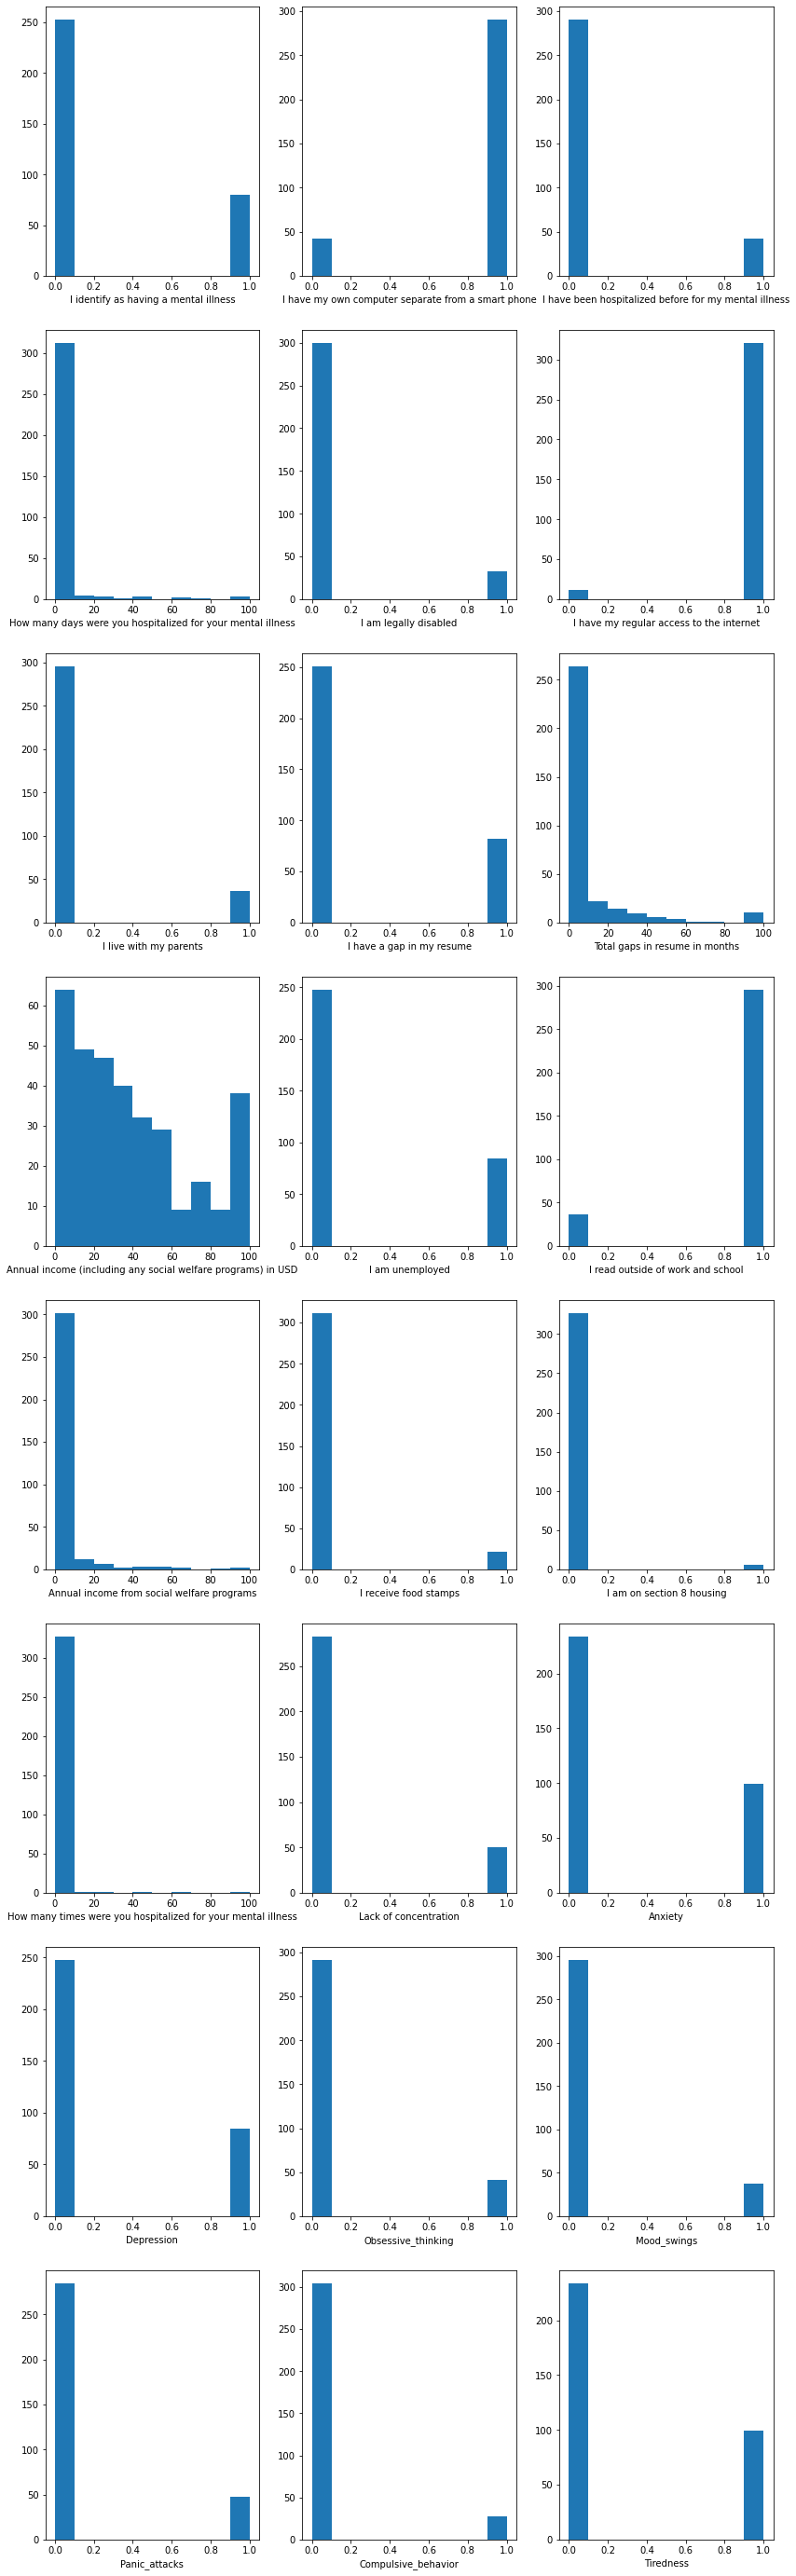

In [33]:
#fig, axs = plt.subplots(len(numeric_cols), figsize=(10,90))
fig = plt.figure(figsize=(14, 50))



for i, col in enumerate(numeric_cols):
    i += 1
    ax = fig.add_subplot(int(len(numeric_cols)/3),3,i)
    ax.hist(data[col])
    ax.set_xlabel(col)

#### Categorical Data

In [34]:
plt.rcParams.update(plt.rcParamsDefault)

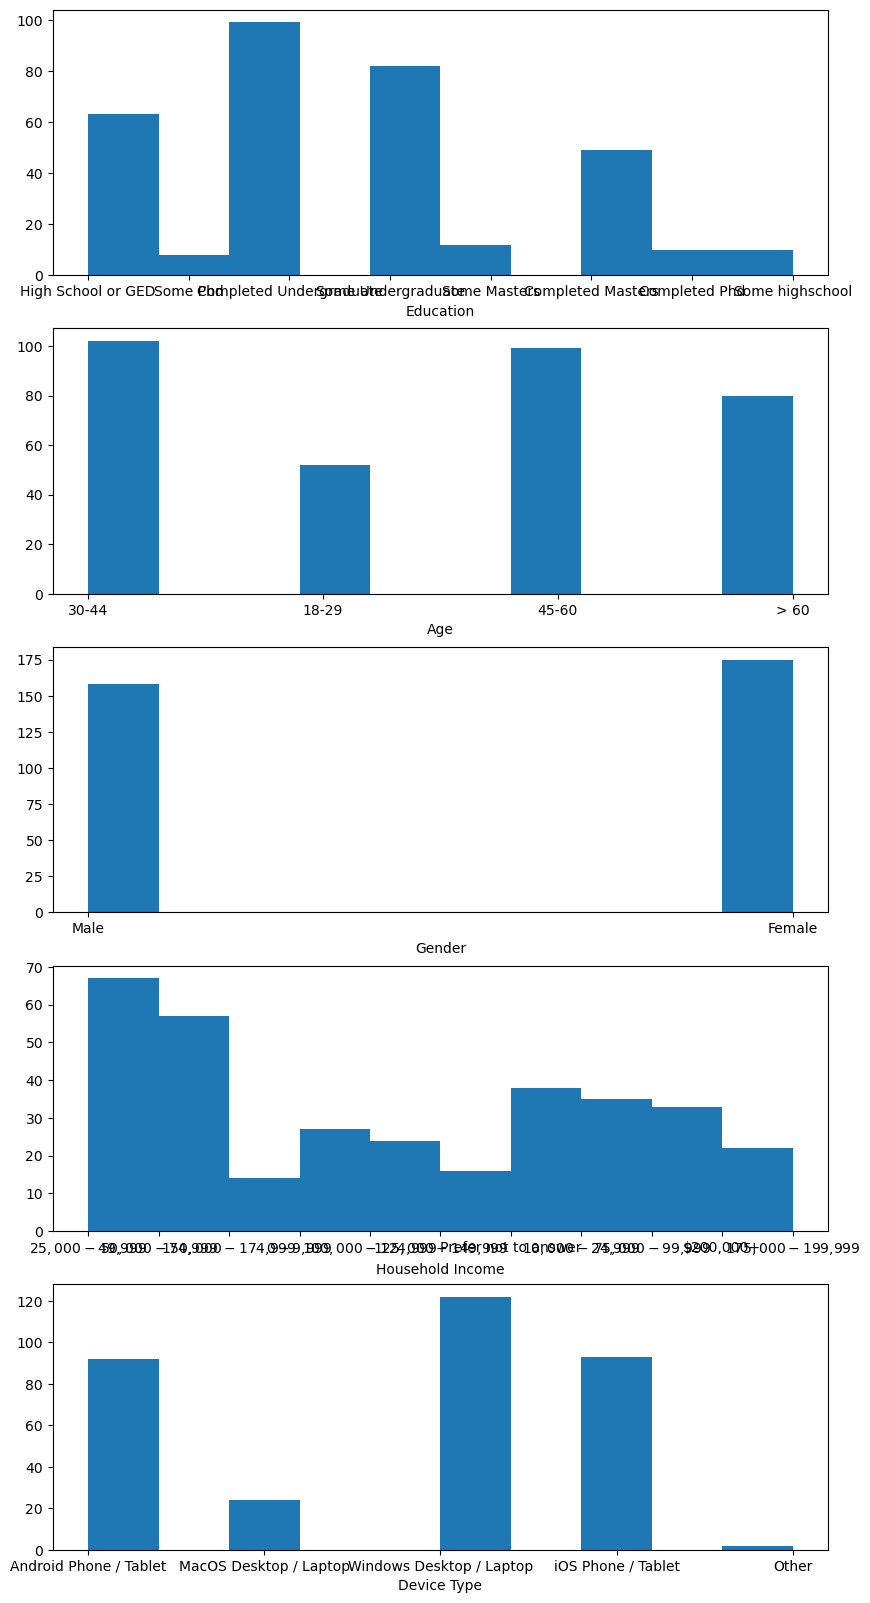

In [35]:
fig, axs = plt.subplots(len(object_cols), figsize=(10,20))

for i, col in enumerate(object_cols):
    axs[i].hist(data[col])
    axs[i].set_xlabel(col)

### Class Balance

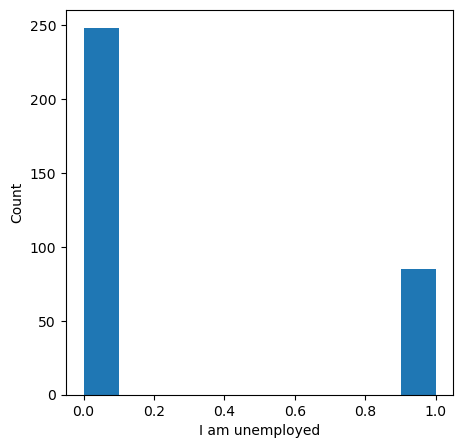

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(data['I am unemployed'])
ax.set_xlabel("I am unemployed")
ax.set_ylabel("Count")
plt.savefig('../img/class_balance.png', bbox_inches="tight")
plt.show()

So we see there is about a 3:1 ratio of employed to unemployed.
Note the class imbalance, so I will be sure to stratify and try out some resampling techniques.

### Univariate Skew
The closer to 0 the more normal the distribution of the feature.

In [37]:
data.skew().sort_values(ascending=False)

How many times were you hospitalized for your mental illness    11.037285
I am on section 8 housing                                        7.279787
How many days were you hospitalized for your mental illness      5.714396
Annual income from social welfare programs                       5.068543
I receive food stamps                                            3.611347
Total gaps in resume in months                                   3.241490
Compulsive_behavior                                              3.011022
I am legally disabled                                            2.695609
Mood_swings                                                      2.486086
I live with my parents                                           2.486086
Obsessive_thinking                                               2.304377
I have been hospitalized before for my mental illness            2.262515
Panic_attacks                                                    2.035488
Lack of concentration                 

Given there are no continuous features, this is of limited use

## Encode Categorical Features

In [38]:
cat_features = [col for col in data.columns if data[col].dtype=='object']
oh_encoder = OneHotEncoder(sparse=False)
oh_data = oh_encoder.fit_transform(data[cat_features])
oh_data.shape

(333, 30)

In [39]:
# create column headers for onehot encoded data
col_headers = []
for i, cat in enumerate(oh_encoder.categories_):
    for label in cat:
        col_headers.append(cat_features[i] + '_' + label)
        
oh_df = pd.DataFrame(columns=col_headers, data=oh_data)
oh_df.head()

,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# drop cat features from original dataframe and add encoded features
encoded_df = data.drop(columns=cat_features, axis=1)
encoded_df= pd.concat([encoded_df, oh_df], axis=1)

## Feature Engineering
- Create col that is the measure of how long it took a person to complete the survey in seconds - perhaps there is a relationship between mental health symptoms reported and time to complete survey

In [41]:
encoded_df['time_to_complete'] = encoded_df['End Date'] - encoded_df['Start Date']
encoded_df['time_to_complete'] = encoded_df['time_to_complete'].apply(lambda x : x.total_seconds())
encoded_df.drop(['Start Date', 'End Date'], axis=1, inplace=True)
encoded_df.head()

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Education_Completed Masters,Education_Completed Phd,Education_Completed Undergraduate,Education_High School or GED,Education_Some Phd,Education_Some Undergraduate,Education_Some highschool,Education_Some Masters,Age_18-29,Age_30-44,Age_45-60,Age_> 60,Gender_Female,Gender_Male,"Household Income_$0-$9,999","Household Income_$10,000-$24,999","Household Income_$100,000-$124,999","Household Income_$125,000-$149,999","Household Income_$150,000-$174,999","Household Income_$175,000-$199,999","Household Income_$200,000+","Household Income_$25,000-$49,999","Household Income_$50,000-$74,999","Household Income_$75,000-$99,999",Household Income_Prefer not to answer,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,time_to_complete
0,0,0,0,0.0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188.0
1,1,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
2,0,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
3,0,1,0,0.0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.0
4,1,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0


# EDA with Ecoded Data
This project explores:
 - Question: Can we predict mental illness based on unemployment and mental health symptoms?
     - Target: 'I identify as having a mental illness'
An alternative questions is:
 - Question: Can we predict unemployment based on unemployment and mental health symptoms?
     - Taget: 'I am unemployed'
     
The relationship of these targets over time would be very interesting but we don't have time-series data here so can't examine that relationship.

### Feature-Target Correlation

In [42]:
corr_mat = encoded_df.corr()

In [43]:
# How do the other features correlate with the target option "I identify as having a mental illness"
corr_mat.loc['I identify as having a mental illness'].sort_values(ascending=False)

I identify as having a mental illness                           1.000000
Depression                                                      0.718687
Anxiety                                                         0.572329
Mood_swings                                                     0.449809
Panic_attacks                                                   0.449645
Obsessive_thinking                                              0.431056
Compulsive_behavior                                             0.412178
Lack of concentration                                           0.373628
I have been hospitalized before for my mental illness           0.336849
How many days were you hospitalized for your mental illness     0.285354
Tiredness                                                       0.280138
I have a gap in my resume                                       0.249629
I am legally disabled                                           0.236941
Total gaps in resume in months                     

In [44]:
# What about with a target of 'I am unemployed'
corr_mat.loc['I am unemployed'].sort_values(ascending=False)

I am unemployed                                                 1.000000
I am legally disabled                                           0.336006
Total gaps in resume in months                                  0.277197
I have a gap in my resume                                       0.256895
Household Income_$0-$9,999                                      0.255056
I receive food stamps                                           0.244803
I have been hospitalized before for my mental illness           0.213256
Panic_attacks                                                   0.210758
Education_Some highschool                                       0.179481
I live with my parents                                          0.165588
Depression                                                      0.162761
Anxiety                                                         0.161686
Device Type_Android Phone / Tablet                              0.146583
I identify as having a mental illness              

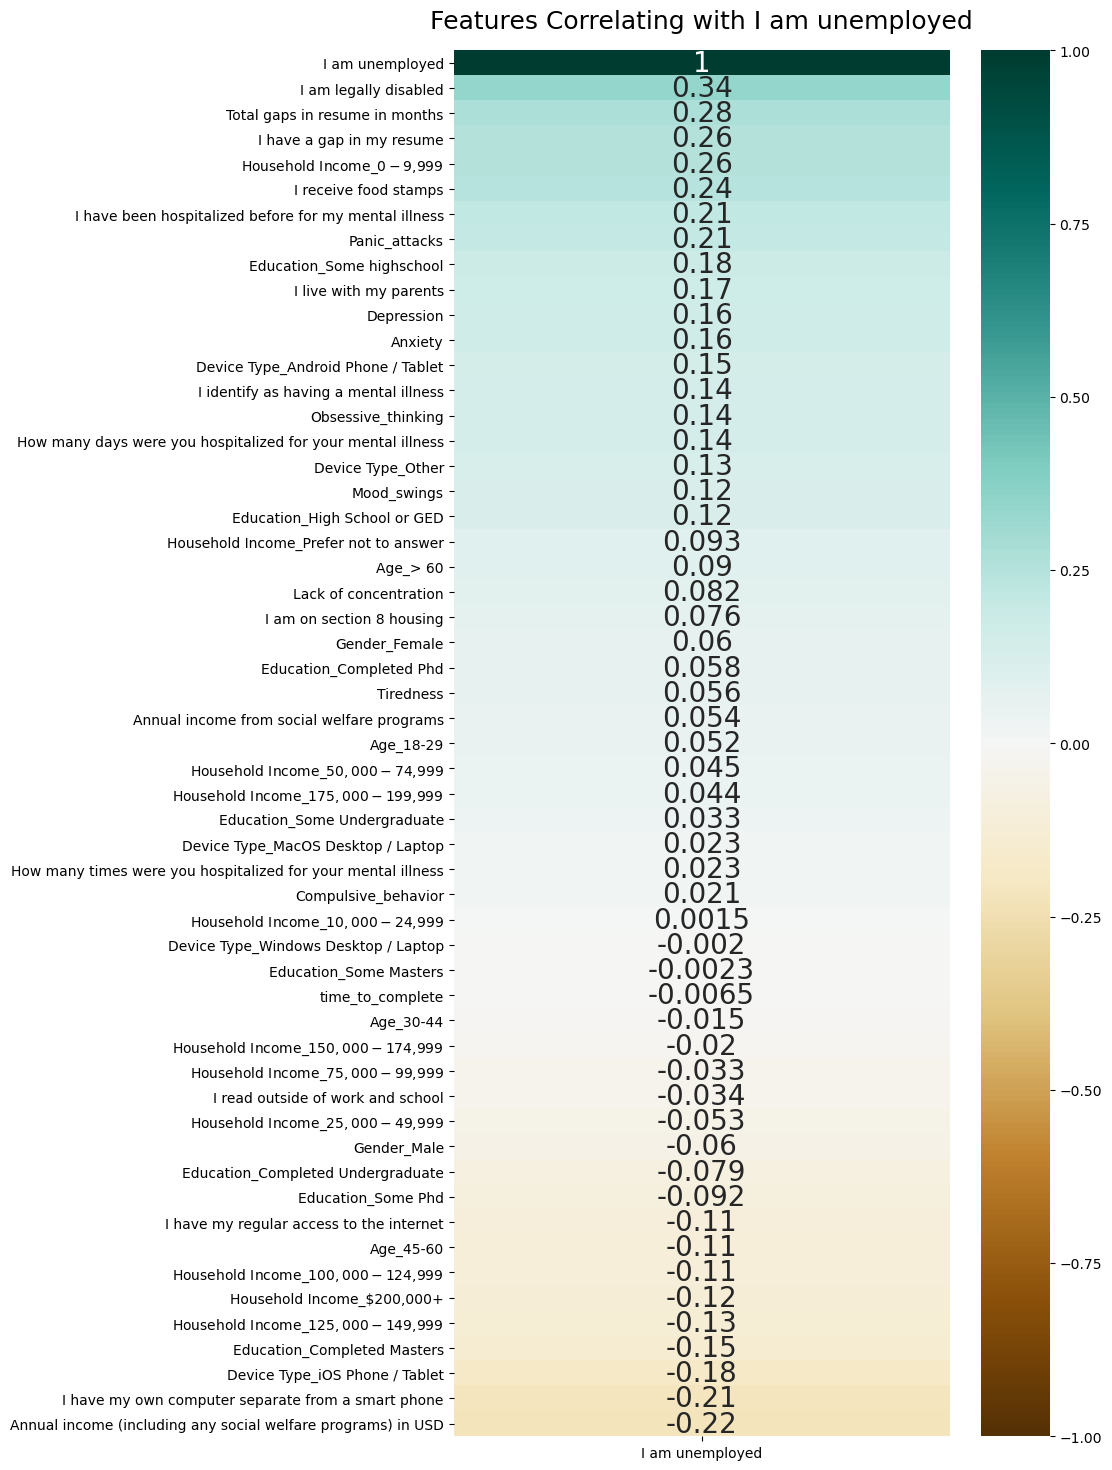

In [45]:
plt.figure(figsize=(8, 18))
heatmap = sns.heatmap(encoded_df.corr()[['I am unemployed']].sort_values(
    by='I am unemployed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 20})
heatmap.set_title('Features Correlating with I am unemployed', fontdict={'fontsize':18}, pad=16);

As expected, it looks like there is colinearity between 'I am unemployed' and 'I am currently employed at least part-time' so it would make sense to drop 'I am currently employed at least part-time'.

<b>Interestingly, there is NOT a strong correlation between income levels (bucket columns or numerical columns) and the unemployment target. </b> I thought there would be high colinearity here and would probably drop the Annyual income columns but this analysis leads me to keep them in the model.

### Feature-Feature Correlation

In [124]:
# How about correlations between features?
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Feature-Feature Correlations")
top_f_f_corr = get_top_abs_correlations(encoded_df, 10)
print(top_f_f_corr)

Top Absolute Feature-Feature Correlations
Gender_Female                                                Gender_Male                                                     1.000000
I identify as having a mental illness                        Depression                                                      0.718687
How many days were you hospitalized for your mental illness  How many times were you hospitalized for your mental illness    0.663152
I have a gap in my resume                                    Total gaps in resume in months                                  0.648102
Obsessive_thinking                                           Compulsive_behavior                                             0.643925
Anxiety                                                      Depression                                                      0.583617
I have been hospitalized before for my mental illness        How many days were you hospitalized for your mental illness     0.575815
I identify as having

Text(51.24999999999993, 0.5, 'Feature Pairs')

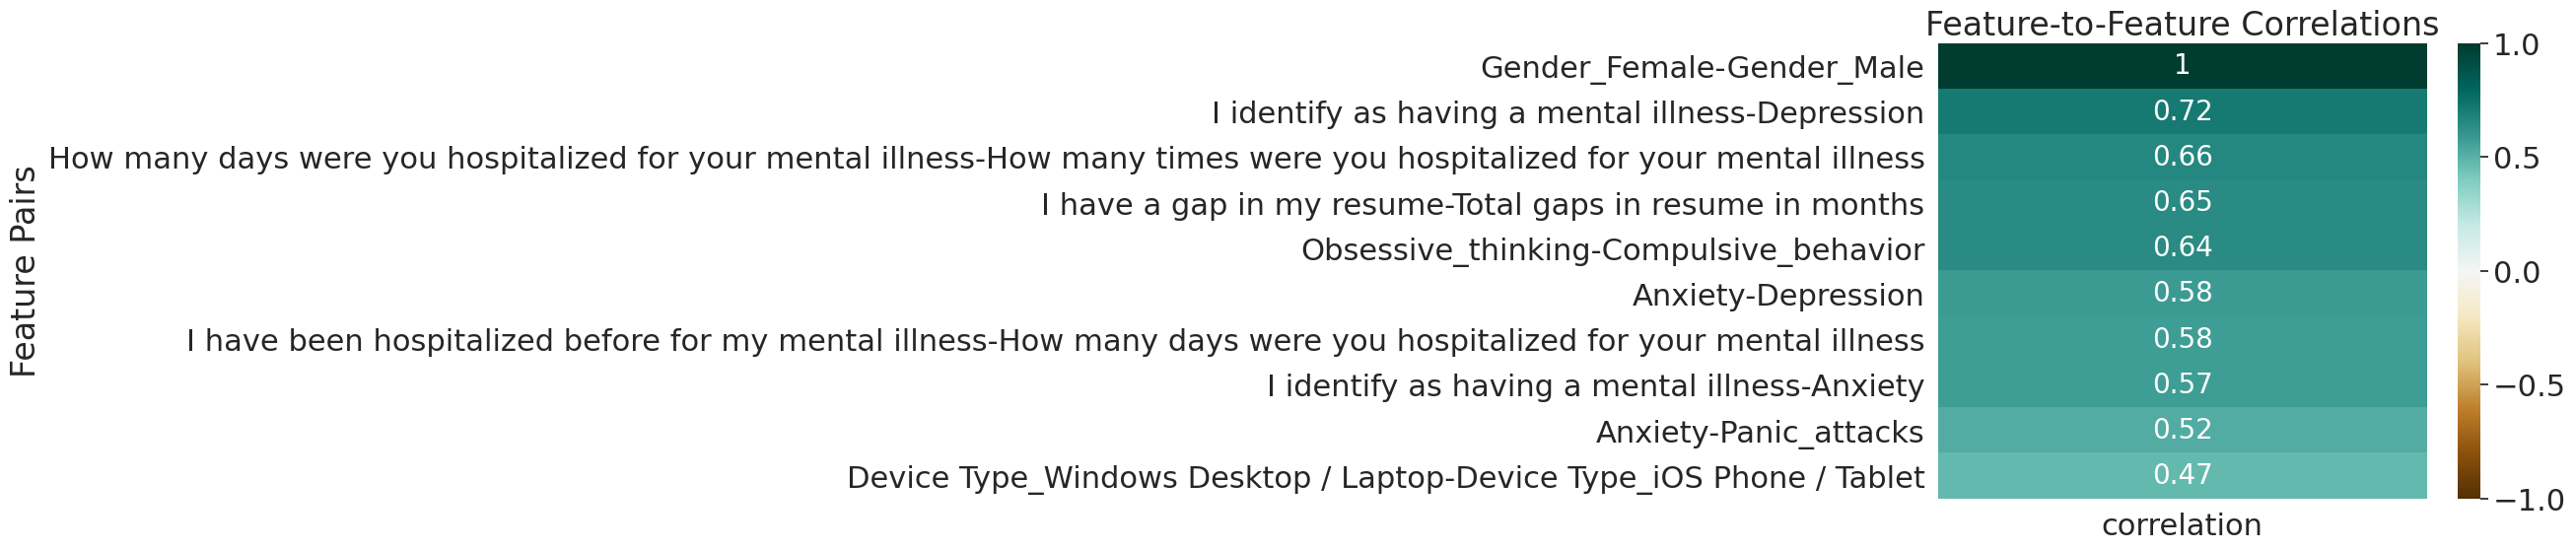

In [47]:
df_f_f_corr = pd.DataFrame(data=top_f_f_corr.values, index=top_f_f_corr.index, columns=['correlation'])
plt.figure(figsize=(8, 6))

sns.set(font_scale=2.0) 
heatmap2 = sns.heatmap(df_f_f_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 20})
heatmap2.set_title('Feature-to-Feature Correlations')
heatmap2.set_ylabel('Feature Pairs')

Male-Female correlation is -1.0 since there was no alternative choices.

Depression is highly correlated with 'I identify with having a mental illness', more so than any other mental health symptom.

Obsessive thinking and compulsive behavior often go hand-in-hand and we see a strong correlation between them here. Same goes for ansiety and depression.

Unsuprisingly, we see variations of questions (e.g. 'How many days were you hospitalized for your mental illness' and  'How many times were you hospitalized for your mental illness') and categorical and numerical versions of the same question (e.g. 'I have been hospitalized before for my mental illness' and 'How many days were you hospitalized for your mental illness') have a high correlations.

# Modeling

## Question: Can we predict unemployment from mental health data?
### Target: 'I am unemployed'

#### V1 - using all features in cleaned df

###### Notes:
Stratify the train-test split to ensure even distribution of classes between the splits

In [48]:
random_seed = 13

y = encoded_df['I am unemployed']
X = encoded_df.drop('I am unemployed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=random_seed, stratify=y)

In [49]:
def score_fitted_model(model, X_test, y_test, file_name=None, title=None):
    target_labels = ['Employed', 'Unemployed']
    
    y_hat = model.predict(X_test)
    
    score_types = {'Accuracy':accuracy_score,'Precision':precision_score, 'Recall':recall_score, 'F1':f1_score}
    
    for metric_name, metric_func in score_types.items():
        print(f'{metric_name}: {round(metric_func(y_test, y_hat),2)}')
    
    fig, ax = plt.subplots(figsize=(4,4))
    if title: 
        ax.set_title(title)
        
    plot_confusion_matrix(model, X_test, y_test, display_labels=target_labels, ax=ax)
    if file_name:
        plt.savefig(f'../img/{file_name}.png', bbox_inches="tight")
    plt.show()
    
    #print(classification_report(y_true=y_test, y_pred=y_hat, target_names=target_labels))

In [50]:
# I think seaborn has changed some of the plt settings and casuing some formatting problems, so let's reset them
plt.rcParams.update(plt.rcParamsDefault)

### Logistic Regression Model

Accuracy: 0.75
Precision: 0.5
Recall: 0.29
F1: 0.37


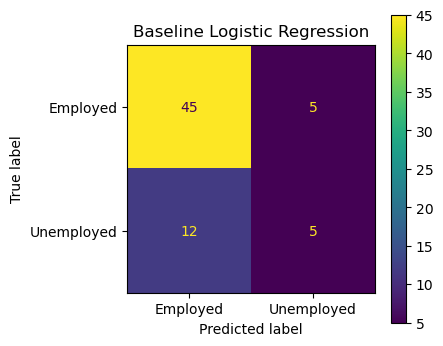

In [51]:
lr = LogisticRegression()
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

score_fitted_model(lr, X_test_scaled, y_test, file_name='conf_mat_baseline_log_reg', title='Baseline Logistic Regression')

### RandomForest

Accuracy: 0.76
Precision: 0.57
Recall: 0.24
F1: 0.33


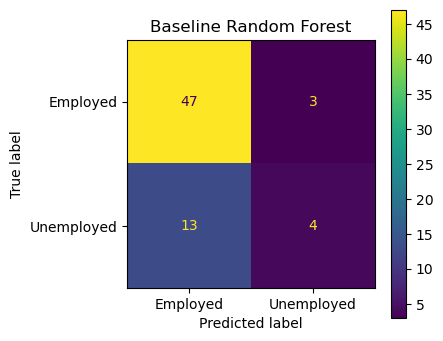

In [52]:
rf_clf = RandomForestClassifier(random_state=random_seed)
rf_clf.fit(X_train, y_train)

score_fitted_model(rf_clf, X_test, y_test, file_name='conf_mat_baseline_rand_for', title='Baseline Random Forest')

The top 20 features

In [53]:
pd.Series(index=X.columns, data=rf_clf.feature_importances_).sort_values(ascending=False)[:10]

Total gaps in resume in months                                  0.095081
Annual income (including any social welfare programs) in USD    0.093761
time_to_complete                                                0.082801
I am legally disabled                                           0.049695
I have a gap in my resume                                       0.030298
Annual income from social welfare programs                      0.027849
I have my own computer separate from a smart phone              0.026268
Household Income_$0-$9,999                                      0.023467
How many days were you hospitalized for your mental illness     0.022811
Device Type_Windows Desktop / Laptop                            0.022805
dtype: float64

In [54]:
pd.DataFrame(index=X.columns, data=rf_clf.feature_importances_, columns=['importance']).sort_values(by='importance', ascending=False)[:10]

,importance
Total gaps in resume in months,0.095081
Annual income (including any social welfare programs) in USD,0.093761
time_to_complete,0.082801
I am legally disabled,0.049695
I have a gap in my resume,0.030298
Annual income from social welfare programs,0.027849
I have my own computer separate from a smart phone,0.026268
"Household Income_$0-$9,999",0.023467
How many days were you hospitalized for your mental illness,0.022811
Device Type_Windows Desktop / Laptop,0.022805


#### Interpreting results.
##### Accuracy and precision are pretty good, but the recall score is not. 
What is the best metric for this case? The cost of a false positive, i.e. predicting someone will become unemployed but they don't, is not likely a great concern, so precision is going to be primary.

On the other hand, a false negative of predicing a person won't become unemployed but does, would mostly likely be a case we would want to avoid the most. Therefore, recall is more important than precision or accuracy.

F1 is a balance of recall and precision. As expected it is somewhere inbetween the two, but it is most helpful in situations where there is a class imbalance and there are more actual negatives. This is the case with our data where we have about a 3:1 ratio of negative to positive target responses. So the F1 score may be the best score for our case.

First, let's use cross validation to see if these results hold up.

#### V2 - Hyperparameter Tuning with All Features in Data

In [55]:
def tune_model(X, y, pipe, params):
    gridsearch = GridSearchCV(estimator=pipe, param_grid=params, scoring='f1', verbose=2, n_jobs=-1).fit(X, y)
    print(f'Best F1 Score: {gridsearch.score(X, y)}')
    
    best_params = gridsearch.best_params_
    print(best_params)
    
    return gridsearch    

In [56]:
pipe_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('estimator', LogisticRegression(max_iter=600, random_state=random_seed))
])

# define parameter ranges in dict
# use double underscore to link pipline object with param name -
# - use the label created when defining the pipe for the test left of the '__'
params_lr = {
    'estimator__solver' : ['lbfgs','liblinear', 'saga'],
    'estimator__penalty' : ['l1','l2','elasticnet'],
    'estimator__class_weight' : ['balanced', None]
}

gridpipe_lr = tune_model(X_train_scaled, y_train, pipe_lr, params_lr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


Best F1 Score: 0.7204968944099378
{'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}


Accuracy: 0.7
Precision: 0.41
Recall: 0.41
F1: 0.41


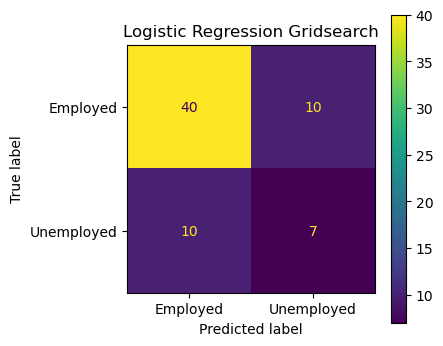

In [107]:
score_fitted_model(gridpipe_lr, X_test_scaled, y_test, file_name=None, title='Logistic Regression Gridsearch')

In [58]:
pipe_rf = Pipeline(steps=[
    ## RandomForests/Decision Trees don't benefit from scaling('scaler', StandardScaler()),
    ('estimator', RandomForestClassifier(random_state=random_seed))
])

# define parameter ranges in dict
# use double underscore to link pipline object with param name -
# - use the label created when defining the pipe for the test left of the '__'
params_rf = {
    'estimator__n_estimators' : np.arange(40, 111, 10),
    'estimator__max_depth' : np.arange(8, 20, 1),
    'estimator__max_features' : ['auto', 'sqrt', 'log2']
}

gridpipe_rf = tune_model(X_train, y_train, pipe_rf, params_rf)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   36.1s


Best F1 Score: 1.0
{'estimator__max_depth': 13, 'estimator__max_features': 'auto', 'estimator__n_estimators': 60}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   41.5s finished


Accuracy: 0.76
Precision: 0.57
Recall: 0.24
F1: 0.33


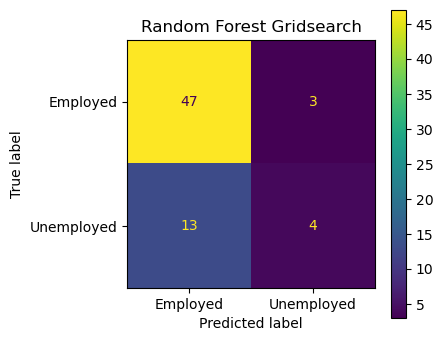

In [108]:
score_fitted_model(gridpipe_rf, X_test, y_test, title='Random Forest Gridsearch')

## Results So Far
The logistic regression is outperforming the RandomForest, which appears to be overfitting. Gridsearch improved recal for the Logistic Regression model by .12 and did not help improve the Random Forest.

Let's remove all income data because of possible colinearity.
And date data, device type and hospitalizations because of low correlation with target

In [60]:
drop_me = [
           'Annual income (including any social welfare programs) in USD',
           'Annual income from social welfare programs',
           'I have been hospitalized before for my mental illness', 
           'How many days were you hospitalized for your mental illness',
           'I have a gap in my resume'
          ]

In [61]:
X_reduced = X.drop(columns=drop_me)

In [62]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size = .2, random_state=random_seed, stratify=y)

Accuracy: 0.75
Precision: 0.5
Recall: 0.29
F1: 0.37


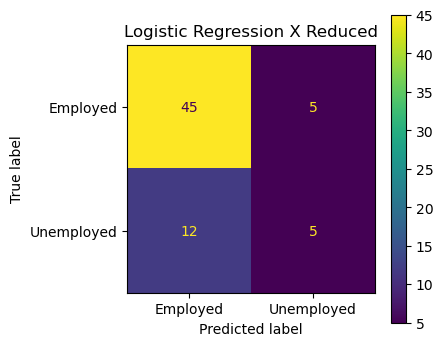

In [110]:
lr2 = LogisticRegression(random_state=random_seed)
scaler = StandardScaler()
X_train_red_scaled  = scaler.fit_transform(X_train_red)
X_test_red_scaled = scaler.transform(X_test_red)

lr2.fit(X_train_red_scaled, y_train_red)

score_fitted_model(lr2, X_test_red_scaled, y_test_red, title='Logistic Regression X Reduced')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished


Best F1 Score: 0.7329192546583851
{'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}
Accuracy: 0.66
Precision: 0.35
Recall: 0.41
F1: 0.38


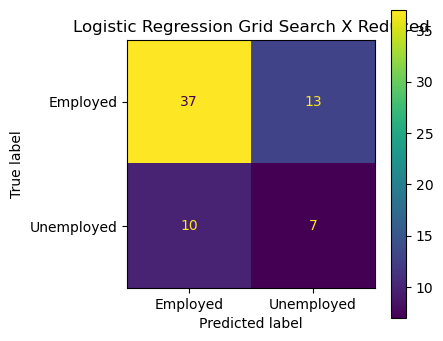

In [111]:
gridpipe_lr2 = tune_model(X_train_red_scaled, y_train_red, pipe_lr, params_lr)
score_fitted_model(gridpipe_lr2, X_test_red_scaled, y_test_red, title='Logistic Regression Grid Search X Reduced')

## V3 - Using Recusive Feature Elimination To Find Best Features

In [65]:
def plot_best_num_of_features(model, rfecv, rfe_scoring, base_filename):
    plt.figure(figsize=(8,4))
    plt.title(f'{model.__class__.__name__} Recusive Feature Elimination with CV Results' )
    plt.xlabel('Num of features selected', fontsize=12, labelpad=20)
    plt.ylabel(f'{rfe_scoring.capitalize()} Score',fontsize=12, labelpad=20)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)
    plt.savefig(f'../img/{base_filename}_rfe_num_features.png', bbox_inches='tight')
    plt.show()
    
    print('Optimal number of features: {}'.format(rfecv.n_features_))

In [66]:
def get_top_rfe_features(X, rfecv):
    M = np.array([X.columns, rfecv.ranking_])
    df_rfe = pd.DataFrame(data=M.T, columns=['feature', 'ranking'])
    
    top_features = df_rfe[df_rfe['ranking']==1]
    display(top_features)
    
    X_most_imp = X[top_features['feature']].copy()
    
    return X_most_imp

In [104]:
def run_rfe(X, y, model, base_filename, rfe_scoring='f1', scale_features=False):
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10), scoring=rfe_scoring, n_jobs=-1)
    
    # this step is undesireable - scaling the entire X matrix will create data leakage - but I can't figure out how to scale within the RFECV process
    if scale_features:
        X2 = StandardScaler().fit_transform(X)
        rfecv.fit(X2, y)
    else:
        X2 = X.copy()
        
    rfecv.fit(X2, y)
    
    plot_best_num_of_features(model, rfecv, rfe_scoring, base_filename)
        
    # Here we use the original X data so that proper scaling can occur if needed
    X_most_imp = get_top_rfe_features(X, rfecv)
    
    X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_most_imp, y, test_size = .2, random_state=random_seed, stratify=y)

    if scale_features:
        scaler_rfe = StandardScaler()
        X_train_rfe  = scaler_rfe.fit_transform(X_train_rfe)
        X_test_rfe = scaler_rfe.transform(X_test_rfe)
        
    model.fit(X_train_rfe, y_train_rfe)
    print('Re-run the model with only the most importnat features of the same train-test split data used in the previous modeling so we can accurately compare the results.')
    print('')
    score_fitted_model(model, X_test_rfe, y_test_rfe, file_name=f'{base_filename}_conf_mat_rfe', title=f'{model.__class__.__name__} with RFECV')
    
    return X_most_imp.columns

### RFECV with Random Forest

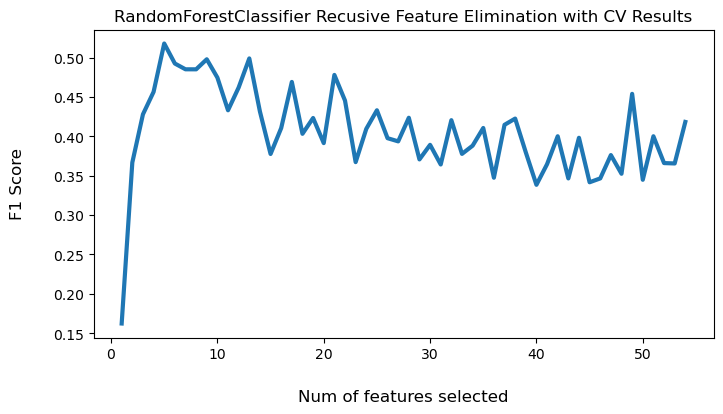

Optimal number of features: 5


,feature,ranking
4,I am legally disabled,1
8,Total gaps in resume in months,1
9,Annual income (including any social welfare pr...,1
11,Annual income from social welfare programs,1
53,time_to_complete,1


Re-run the model with only the most importnat features of the same train-test split data used in the previous modeling so we can accurately compare the results.

Accuracy: 0.78
Precision: 0.56
Recall: 0.53
F1: 0.55


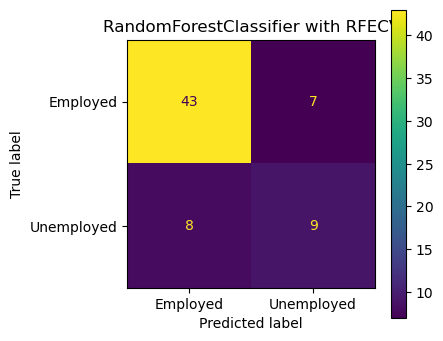

In [105]:
X_most_imp_rand_for = run_rfe(X, y, RandomForestClassifier(random_state=random_seed), base_filename='rand_forest')

#### Notice the engineered feature, "time_to_complete" is one of the most important

### RFECV with Logistic Regression

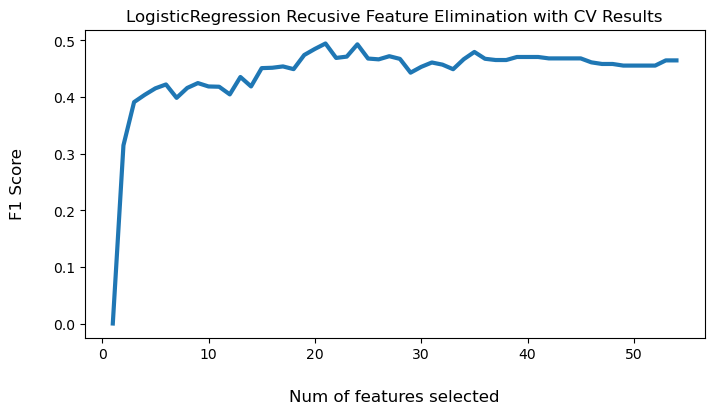

Optimal number of features: 21


,feature,ranking
4,I am legally disabled,1
7,I have a gap in my resume,1
8,Total gaps in resume in months,1
9,Annual income (including any social welfare pr...,1
12,I receive food stamps,1
17,Depression,1
18,Obsessive_thinking,1
20,Panic_attacks,1
21,Compulsive_behavior,1
27,Education_Some Phd,1


Re-run the model with only the most importnat features of the same train-test split data used in the previous modeling so we can accurately compare the results.

Accuracy: 0.75
Precision: 0.5
Recall: 0.24
F1: 0.32


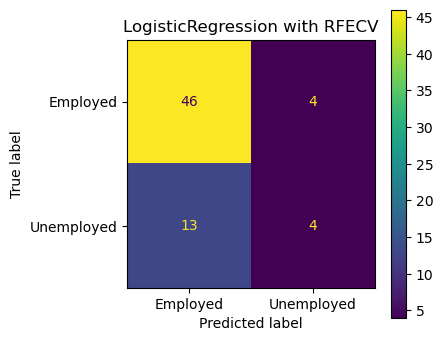

In [106]:
X_most_imp_log_reg = run_rfe(X, y, LogisticRegression(random_state=random_seed), base_filename='logistic_regression', scale_features=True)

### Does Hyperparameter tuning with Gridsearch help the Random Forest?

In [112]:
X_most_imp = X[X_most_imp_rand_for].copy()

In [114]:
# recreating the train test split from the RFECV function
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_most_imp, y, test_size = .2, random_state=random_seed, stratify=y)

In [116]:
pipe_rf_rfe = Pipeline(steps=[
    ## RandomForests/Decision Trees don't benefit from scaling('scaler', StandardScaler()),
    ('estimator', RandomForestClassifier(random_state=random_seed))
])

# define parameter ranges in dict
# use double underscore to link pipline object with param name -
# - use the label created when defining the pipe for the test left of the '__'
params_rf_rfe = {
    'estimator__n_estimators' : np.arange(40, 111, 10),
    'estimator__max_depth' : np.arange(8, 20, 1),
    'estimator__max_features' : ['auto', 'sqrt', 'log2']
}

gridpipe_rf_rfe = tune_model(X_train_rfe, y_train_rfe, pipe_rf_rfe, params_rf_rfe)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   31.2s


Best F1 Score: 0.9774436090225563
{'estimator__max_depth': 12, 'estimator__max_features': 'auto', 'estimator__n_estimators': 110}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   36.4s finished


Accuracy: 0.76
Precision: 0.53
Recall: 0.47
F1: 0.5


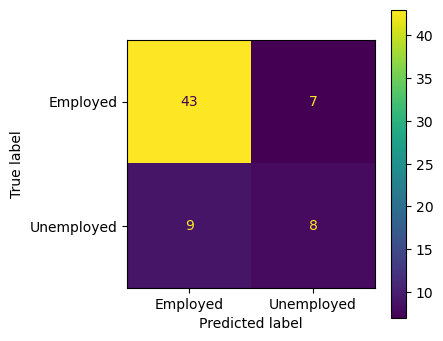

In [117]:
plt.rcParams.update(plt.rcParamsDefault)
score_fitted_model(gridpipe_rf_rfe, X_test_rfe, y_test_rfe, file_name='conf_mat_rfe_gridsearch')

## No, it doesn't improve things

In [118]:
def run_cv_rf(X, y):
    pipe = make_pipeline(RandomForestClassifier())
    skf = StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy')
    print(f'Accuracy Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='recall')
    print(f'Recall Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='f1')
    print(f'F1 Scores: {scores}')
    print(f'\tMean:{scores.mean()}')

run_cv_rf(X, y)

Accuracy Scores: [0.82352941 0.76470588 0.82352941 0.75757576 0.81818182 0.75757576
 0.6969697  0.87878788 0.78787879 0.72727273]
	Mean:0.7836007130124777
Recall Scores: [0.22222222 0.33333333 0.33333333 0.22222222 0.44444444 0.125
 0.125      0.625      0.25       0.375     ]
	Mean:0.3055555555555555
F1 Scores: [0.36363636 0.46153846 0.61538462 0.5        0.61538462 0.
 0.16666667 0.54545455 0.46153846 0.30769231]
	Mean:0.4037296037296037


In [120]:
X.shape

(333, 54)

In [121]:
list(X.columns)

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'How many days were you hospitalized for your mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness',
 'Education_Completed Masters',
 'Education_Completed Phd',
 'Education_Completed Undergraduate',
 'Education_High School or GED',
 'Education_Some Phd',
 'Education_Some Undergraduate',
 'Education_

# Possible Additional Steps
- PCA?
- Oversampling to balance classes?
- Turn buckets into averages instead of OneHotEncoding?